In [1]:
import matplotlib as plt
import tensorflow as tf
import numpy as np
import cv2 
import os
import PIL

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir


'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

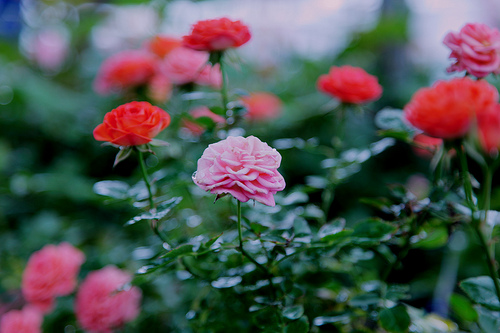

In [8]:
PIL.Image.open(str(roses[1]))

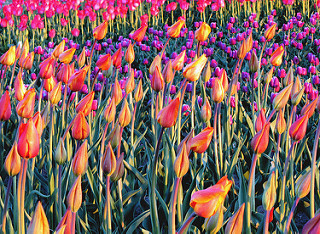

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]


[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])


'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))


In [15]:
img.shape


(243, 500, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [43]:
num_classes = 5 #because we have  5 classes.

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.3304 - loss: 1.5608
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 168ms/step - accuracy: 0.6024 - loss: 1.0484
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.6813 - loss: 0.8475
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - accuracy: 0.8143 - loss: 0.5268
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.8939 - loss: 0.3242
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - accuracy: 0.9411 - loss: 0.1935
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.9749 - loss: 0.0874
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - accuracy: 0.9850 - loss: 0.0534
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - accuracy: 0.9931 - loss: 0.0423
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.9830 - loss: 0.0671


In [22]:
model.evaluate(X_test_scaled,y_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6364 - loss: 1.8915


[1.9389821290969849, 0.6427015066146851]

Here we see that while train accuracy is very high (near 99%), the test accuracy is significantly low (63%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


array([[  0.46233404,   6.1253886 ,  -2.980635  ,  -7.1163945 ,
         -5.0053425 ],
       [  7.398931  ,  -2.8571727 ,  -8.801109  ,  -0.37119886,
          2.5811915 ],
       [ -5.2124014 , -10.276396  ,  11.001236  ,   4.841641  ,
         -8.560225  ],
       ...,
       [ -6.689103  ,  -2.4890046 ,   1.0197331 ,   9.028055  ,
         -2.2807384 ],
       [  4.7111015 ,  -1.7396579 ,  -8.758169  ,  -6.1585793 ,
          3.1541731 ],
       [ -4.478471  , -14.550831  ,  -2.2110276 ,  23.087584  ,
          3.5856278 ]], dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])


In [25]:
np.argmax(score)


1

In [26]:
y_test[0]


1

Improve Test Accuracy Using Data Augmentation

In [33]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal", 
                            input_shape=(img_height, img_width, 3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


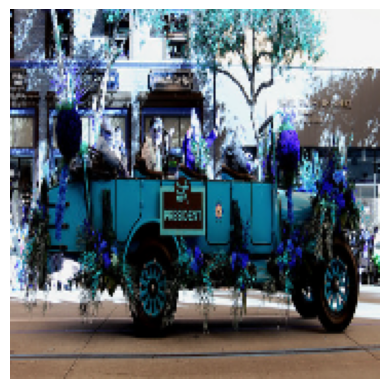

In [35]:
import matplotlib.pyplot as plt

plt.axis('off')  # Eksenleri kapatır
plt.imshow(X[0])  # Görüntüyü gösterir
plt.show()  # Görüntüyü pencerede gösterir


Newly generated training sample using data augmentation

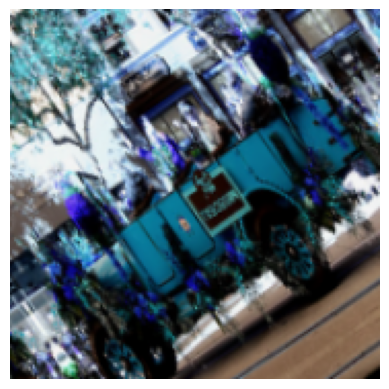

In [36]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [38]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)    

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - accuracy: 0.4200 - loss: 1.3302
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - accuracy: 0.5913 - loss: 1.0352
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.6587 - loss: 0.9054
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.6871 - loss: 0.8406
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.6912 - loss: 0.7827
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.7381 - loss: 0.6978
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.7318 - loss: 0.7121
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.7466 - loss: 0.6637
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - accuracy: 0.7803 - loss: 0.6064
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 154ms/step - accuracy: 0.7722 - loss: 0.5995


In [39]:
model.evaluate(X_test_scaled,y_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7070 - loss: 0.7908


[0.7837264537811279, 0.7135076522827148]

You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 71.74%